<center><h1>Comparer des outils</h1></center>

Même si vous ne les utilisez pas encore vous-même, sachez que tous les outils ne se valent pas, et qu'il faut prendre le temps d'en utiliser plusieurs.<br>
Ici nous allons utiliser <b>pie</b> et <b>cltk</b>. Et voir les différences pour un même texte.

<h2>I. Commençons par <b>pie</b></h2>

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
from typing import List

In [2]:
from pie_extended.cli.utils import get_tagger, get_model, download

fatal: ni ceci ni aucun de ses répertoires parents n'est un dépôt git : .git


Ici on va d'abord devoir télécharger les modèles d'entraînement pour que le lemmatiseur fonctionne. Mettez "False" à la place de "True" si vous avez déjà téléchargé le modèle.

In [3]:
do_download = True
if do_download:
    for dl in download("lasla"):
        x = 1

[████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████]
[████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████]
[██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████

Ensuite, on va demander au lemmatiseur de se paramétrer, et d'utiliser le modèle que l'on vient de télécharger.

In [4]:
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)

Enfin, on va lui donner un texte à analyser, en l'occurrence le chant I de l'<i>Odyssée</i>.

In [5]:
base_string=open("./texts/aen1.txt").read()
sentences: List[str] = [base_string]

Maintenant le vrai travail d'analyse commence. Voilà comment pie analyse le grec.

In [6]:
from pie_extended.models.grc.imports import get_iterator_and_processor
dictionary=list()
for sentence_group in sentences:
    iterator, processor = get_iterator_and_processor()
    for form in tagger.tag_str(sentence_group, iterator=iterator, processor=processor):
        #form is a dictionary, you can call the value you want by key.
        dictionary.append({"form": form['form'], 'lemma': form["lemma"], 'pos': form["pos"]})

In [7]:
print(len(dictionary))
print(dictionary[1])

6163
{'form': ':', 'lemma': '2', 'pos': 'INJ'}


On va maintenant voir quelles sont les stats de base qu'on en tire : combien de verbes, combien d'adjectifs etc.

In [8]:
nouns=0
propers=0
vbs=0
adjs=0
conjs=0
    
for element in dictionary :
    if element['pos'] == "NOMpro":
        propers+=1
    elif "NOM" in element['pos']:
        nouns+=1
    elif "VER" in element['pos']:
        vbs+=1
    elif "ADJ" in element['pos']:
        adjs+=1
    elif "CON" in element['pos']:
        conjs+=1

In [9]:
total_len=nouns+vbs+adjs+conjs+propers
nNames=(nouns*100)/total_len
nVerbs=(vbs*100)/total_len
nAdjectives=(adjs*100)/total_len
nConj=(conjs*100)/total_len
nPropers=(propers*100)/total_len
parts=[nNames,nVerbs,nConj,nAdjectives,nPropers]

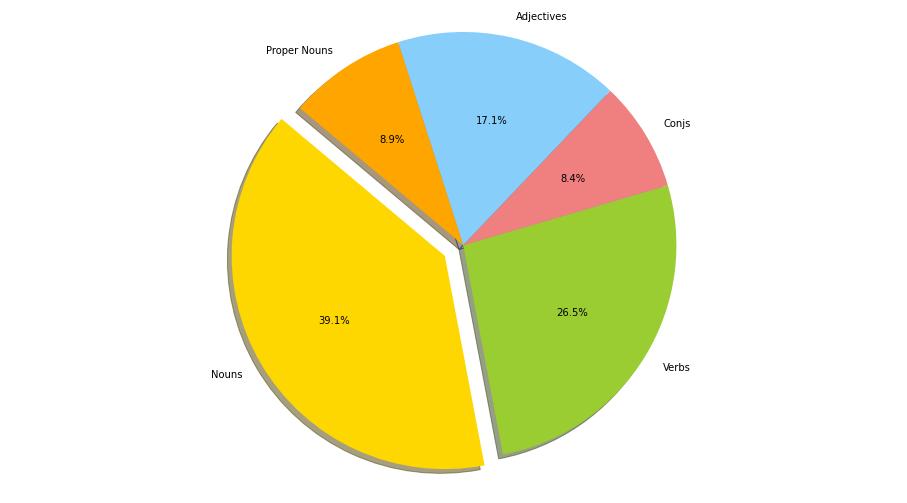

In [10]:
labels = 'Nouns','Verbs','Conjs','Adjectives','Proper Nouns'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0,0,0 )
plt.pie(parts, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

<h2>II. Maintenant, CLTK</h2>

In [17]:
from cltk.corpus.utils.importer import CorpusImporter
my_greek_downloader = CorpusImporter('latin')
my_greek_downloader.import_corpus('latin_models_cltk')
from cltk.tokenize.word import WordTokenizer
word_tokenizer = WordTokenizer('latin')
athenaeus_word_tokens = word_tokenizer.tokenize(base_string)
athenaeus_word_tokens = [token for token in athenaeus_word_tokens if token not in ['.', ',', ':', ';']]

from cltk.stem.lemma import LemmaReplacer
lemmatizer = LemmaReplacer('latin')
lemmata = lemmatizer.lemmatize(athenaeus_word_tokens)

ModuleNotFoundError: No module named 'cltk'

In [15]:
print(lemmata)

['ἀνήρ', 'ἐγώ', 'ἐνέπω', 'μοῦσα', 'πολύτροπον', 'ὃς', 'μάλα', 'πολλὰ', 'πλάγχθη', 'ἐπεὶ', 'Τροίης', 'ἱερὸν', 'πτολίεθρον', 'ἔπερσε·', 'πολύς', 'δ', "'", 'ἀνθρώπων', 'εἶδον', 'ἄστυ', 'καὶ', 'νόον', 'γιγνώσκω', 'πολλὰ', 'δ', "'", 'ὁ', 'γ', "'", 'ἐν', 'πόντῳ', 'πάθεν', 'ἄλγος', 'ὃν', 'κατὰ', 'θυμόν', 'ἀρνύμενος', 'ὅς', 'τε', 'ψυχὴν', 'καὶ', 'νόστον', 'ἑταίρων', '5', 'Ἀλλ', "'", 'οὐδ', "'", 'ὡς', 'ἑτάρους', 'ἐρρύσατο', 'ἱέμενός', 'περ·', 'αὐτός', 'γὰρ', 'σφετέρῃσιν', 'ἀτασθαλίῃσιν', 'ὄλλυμι', 'νήπιοι', 'οἳ', 'κατὰ', 'βοῦς', 'Ὑπερίονος', 'Ἠελίοιο', 'ἤσθιον·', 'αὐτὰρ', 'ὁ', 'ὁ', 'ἀφείλετο', 'νόστιμον', 'ἦμαρ', 'ὁ', 'ἁμόθεν', 'γε', 'θεά', 'θύγατερ', 'Διός', 'εἰπὲ', 'καὶ', 'ἐγώ', '10', 'Ἔνθ', "'", 'ἄλλος', 'μὲν', 'πάντες', 'ὅσος', 'φύγον', 'αἰπὺν', 'ὄλεθρος', 'ἔοικα', 'εἰμί', 'πόλεμόν', 'τε', 'πεφευγότες', 'ἠδὲ', 'θάλασσαν·', 'τὸν', 'δ', "'", 'οἶος', 'νόστου', 'κεχρημένον', 'ἠδὲ', 'γυναικός', 'νύμφη', 'πότνι', "'", 'ἐρύκω', 'Καλυψώ', 'δῖος', 'θεάων', 'ἐν', 'σπέεσι', 'γλαφυρός', 'λιλαιομένη

In [39]:
from cltk.tag.pos import POSTag
tagger = POSTag('greek')

homer_lemmatized=" ".join(lemmata)

homer_tagged = tagger.tag_crf(homer_lemmatized)

In [40]:
print(homer_tagged)

[('ἀνήρ', 'N-S---MN-'), ('ἐγώ', 'P-S---MN-'), ('ἐνέπω', 'V1SPIA---'), ('μου', 'P-S---MG-'), ('͂', 'L-S---MA-'), ('σα', 'A-S---MA-'), ('πολύτροπον', 'N-S---MA-'), ('ὃς', 'P-S---MN-'), ('μάλα', 'N-P---NN-'), ('πολλὰ', 'A-P---NN-'), ('πλάγχθη', 'V3SAIP---'), ('ἐπεὶ', 'C--------'), ('Τροίης', 'N-S---FG-'), ('ἱερὸν', 'A-S---MA-'), ('πτολίεθρον', 'N-S---MA-'), ('ἔπερσε', 'V3SAIA---'), ('·', 'U--------'), ('πολύς', 'A-S---MN-'), ('δ', 'G--------'), ("'", 'U--------'), ('ἀνθρώπων', 'T-SPPAMN-'), ('εἶδον', 'A-S---NA-'), ('ἄστυ', 'N-S---NA-'), ('καὶ', 'C--------'), ('νόον', 'N-S---MA-'), ('γιγνώσκω', 'V1SPIA---'), ('πολλὰ', 'A-P---NA-'), ('δ', 'G--------'), ("'", 'U--------'), ('ὁ', 'P-S---MN-'), ('γ', 'G--------'), ("'", 'U--------'), ('ἐν', 'R--------'), ('πόντῳ', 'N-S---MD-'), ('πάθεν', 'D--------'), ('ἄλγος', 'N-S---NN-'), ('ὃν', 'P-S---MA-'), ('κατὰ', 'R--------'), ('θυμόν', 'N-S---FA-'), ('ἀρνύμενος', 'T-SAPMMN-'), ('ὅς', 'P-S---MN-'), ('τε', 'G--------'), ('ψυχὴν', 'N-S---FA-'), ('καὶ', '

In [41]:
nouns=0
propers=0
vbs=0
adjs=0
conjs=0
    
for element in homer_tagged :
    print(element)
    if element[1].startswith("N") and element[0][0].isupper():
        propers+=1
    elif element[1].startswith("N"):
        nouns+=1
    elif element[1].startswith("V"):
        vbs+=1
    elif element[1].startswith("A"):
        adjs+=1
    elif element[1].startswith("C"):
        conjs+=1

('ἀνήρ', 'N-S---MN-')
('ἐγώ', 'P-S---MN-')
('ἐνέπω', 'V1SPIA---')
('μου', 'P-S---MG-')
('͂', 'L-S---MA-')
('σα', 'A-S---MA-')
('πολύτροπον', 'N-S---MA-')
('ὃς', 'P-S---MN-')
('μάλα', 'N-P---NN-')
('πολλὰ', 'A-P---NN-')
('πλάγχθη', 'V3SAIP---')
('ἐπεὶ', 'C--------')
('Τροίης', 'N-S---FG-')
('ἱερὸν', 'A-S---MA-')
('πτολίεθρον', 'N-S---MA-')
('ἔπερσε', 'V3SAIA---')
('·', 'U--------')
('πολύς', 'A-S---MN-')
('δ', 'G--------')
("'", 'U--------')
('ἀνθρώπων', 'T-SPPAMN-')
('εἶδον', 'A-S---NA-')
('ἄστυ', 'N-S---NA-')
('καὶ', 'C--------')
('νόον', 'N-S---MA-')
('γιγνώσκω', 'V1SPIA---')
('πολλὰ', 'A-P---NA-')
('δ', 'G--------')
("'", 'U--------')
('ὁ', 'P-S---MN-')
('γ', 'G--------')
("'", 'U--------')
('ἐν', 'R--------')
('πόντῳ', 'N-S---MD-')
('πάθεν', 'D--------')
('ἄλγος', 'N-S---NN-')
('ὃν', 'P-S---MA-')
('κατὰ', 'R--------')
('θυμόν', 'N-S---FA-')
('ἀρνύμενος', 'T-SAPMMN-')
('ὅς', 'P-S---MN-')
('τε', 'G--------')
('ψυχὴν', 'N-S---FA-')
('καὶ', 'C--------')
('νόστον', 'N-S---MA-')
('ἑταίρω

("'", 'U--------')
('ἀρνέομαι', 'V1SPIE---')
('στυγερὸν', 'A-S---NN-')
('γάμον', 'A-S---NN-')
('ου', 'N-S---NN-')
('̓́', 'A-S---NN-')
('τε', 'G--------')
('τελευτὴν', 'N-S---FA-')
('ποιέω', 'V1SPIA---')
('δύναται', 'V3SPIE---')
('·', 'U--------')
('τοὶ', 'P-P---MN-')
('δὲ', 'G--------')
('φθινύθουσιν', 'N-P---MD-')
('ἔδω', 'V1SPIA---')
('250', 'A-S---NV-')
('οἶκος', 'N-S---NV-')
('ἐμόν', 'A-S---NV-')
('·', 'U--------')
('τάχα', 'D--------')
('δή', 'G--------')
('ἐγώ', 'P-S---MN-')
('διαρραίσουσι', 'V3PPIA---')
('καὶ', 'C--------')
('αὐτόν', 'N-S---FA-')
('»', 'U--------')
('Τὸν', 'N-S---MA-')
('δ', 'G--------')
("'", 'U--------')
('ἐπαλαστήσασα', 'T-SAPAFN-')
('προσηύδα', 'A-S---FN-')
('Παλλὰς', 'N-S---FN-')
('Ἀθήνη', 'N-S---FN-')
('·', 'U--------')
('«', 'U--------')
('Ὢ', 'N-P---MV-')
('πόποι', 'A-P---MV-')
('εἰμί', 'V1SPIA---')
('δὴ', 'G--------')
('πολλὸν', 'A-S---NA-')
('ἀποιχομένου', 'N-S---MG-')
('ὀδυσσεύς', 'N-S---MN-')
('δεύῃ', 'V3SASA---')
('ὁ', 'L-S---MN-')
('ἄν1', 'A-S---MN

In [42]:
total_len=nouns+vbs+adjs+conjs+propers
nNames=(nouns*100)/total_len
nVerbs=(vbs*100)/total_len
nAdjectives=(adjs*100)/total_len
nConj=(conjs*100)/total_len
nPropers=(propers*100)/total_len
parts=[nNames,nVerbs,nConj,nAdjectives,nPropers]

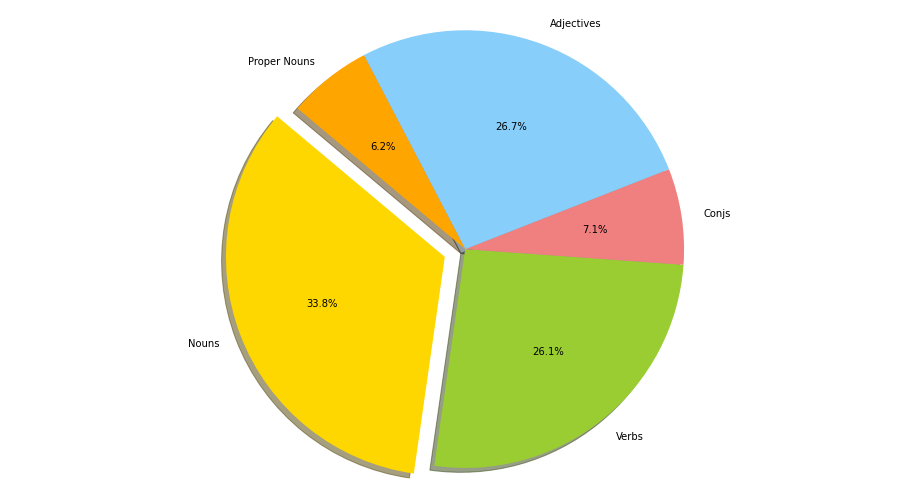

In [43]:
labels = 'Nouns','Verbs','Conjs','Adjectives','Proper Nouns'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0,0,0 )
plt.pie(parts, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()